In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
import seaborn as sns

In [34]:
data_df = pd.read_csv('SIR_simulation_2000_200_15.csv')
data_df.head()

,time,I,pol,r,ar,cc,kind,net_type
0,0,5.00,0.1,0.1,1305,0.030,mean,static
1,0,0.00,0.1,0.1,63,0.002,std,static
2,1,11.59,0.1,0.1,1305,0.030,mean,static
3,1,2.04,0.1,0.1,63,0.002,std,static
4,2,41.78,0.1,0.1,1305,0.030,mean,static


# Prevalence curves

In [35]:
mask1 = (data_df.net_type == 'static') & (data_df.kind == 'mean')
mask2 = (data_df.net_type == 'static') & (data_df.kind == 'std')
mask3 = (data_df.net_type == 'dynamic') & (data_df.kind == 'mean')
mask4 = (data_df.net_type == 'dynamic') & (data_df.kind == 'std')

static_mean = data_df[mask1].filter(items=['time', 'I', 'r', 'pol'])
static_std = data_df[mask2].filter(items=['time', 'I', 'r', 'pol'])
dynamic_mean = data_df[mask3].filter(items=['time', 'I', 'r', 'pol'])
dynamic_std = data_df[mask4].filter(items=['time', 'I', 'r', 'pol'])

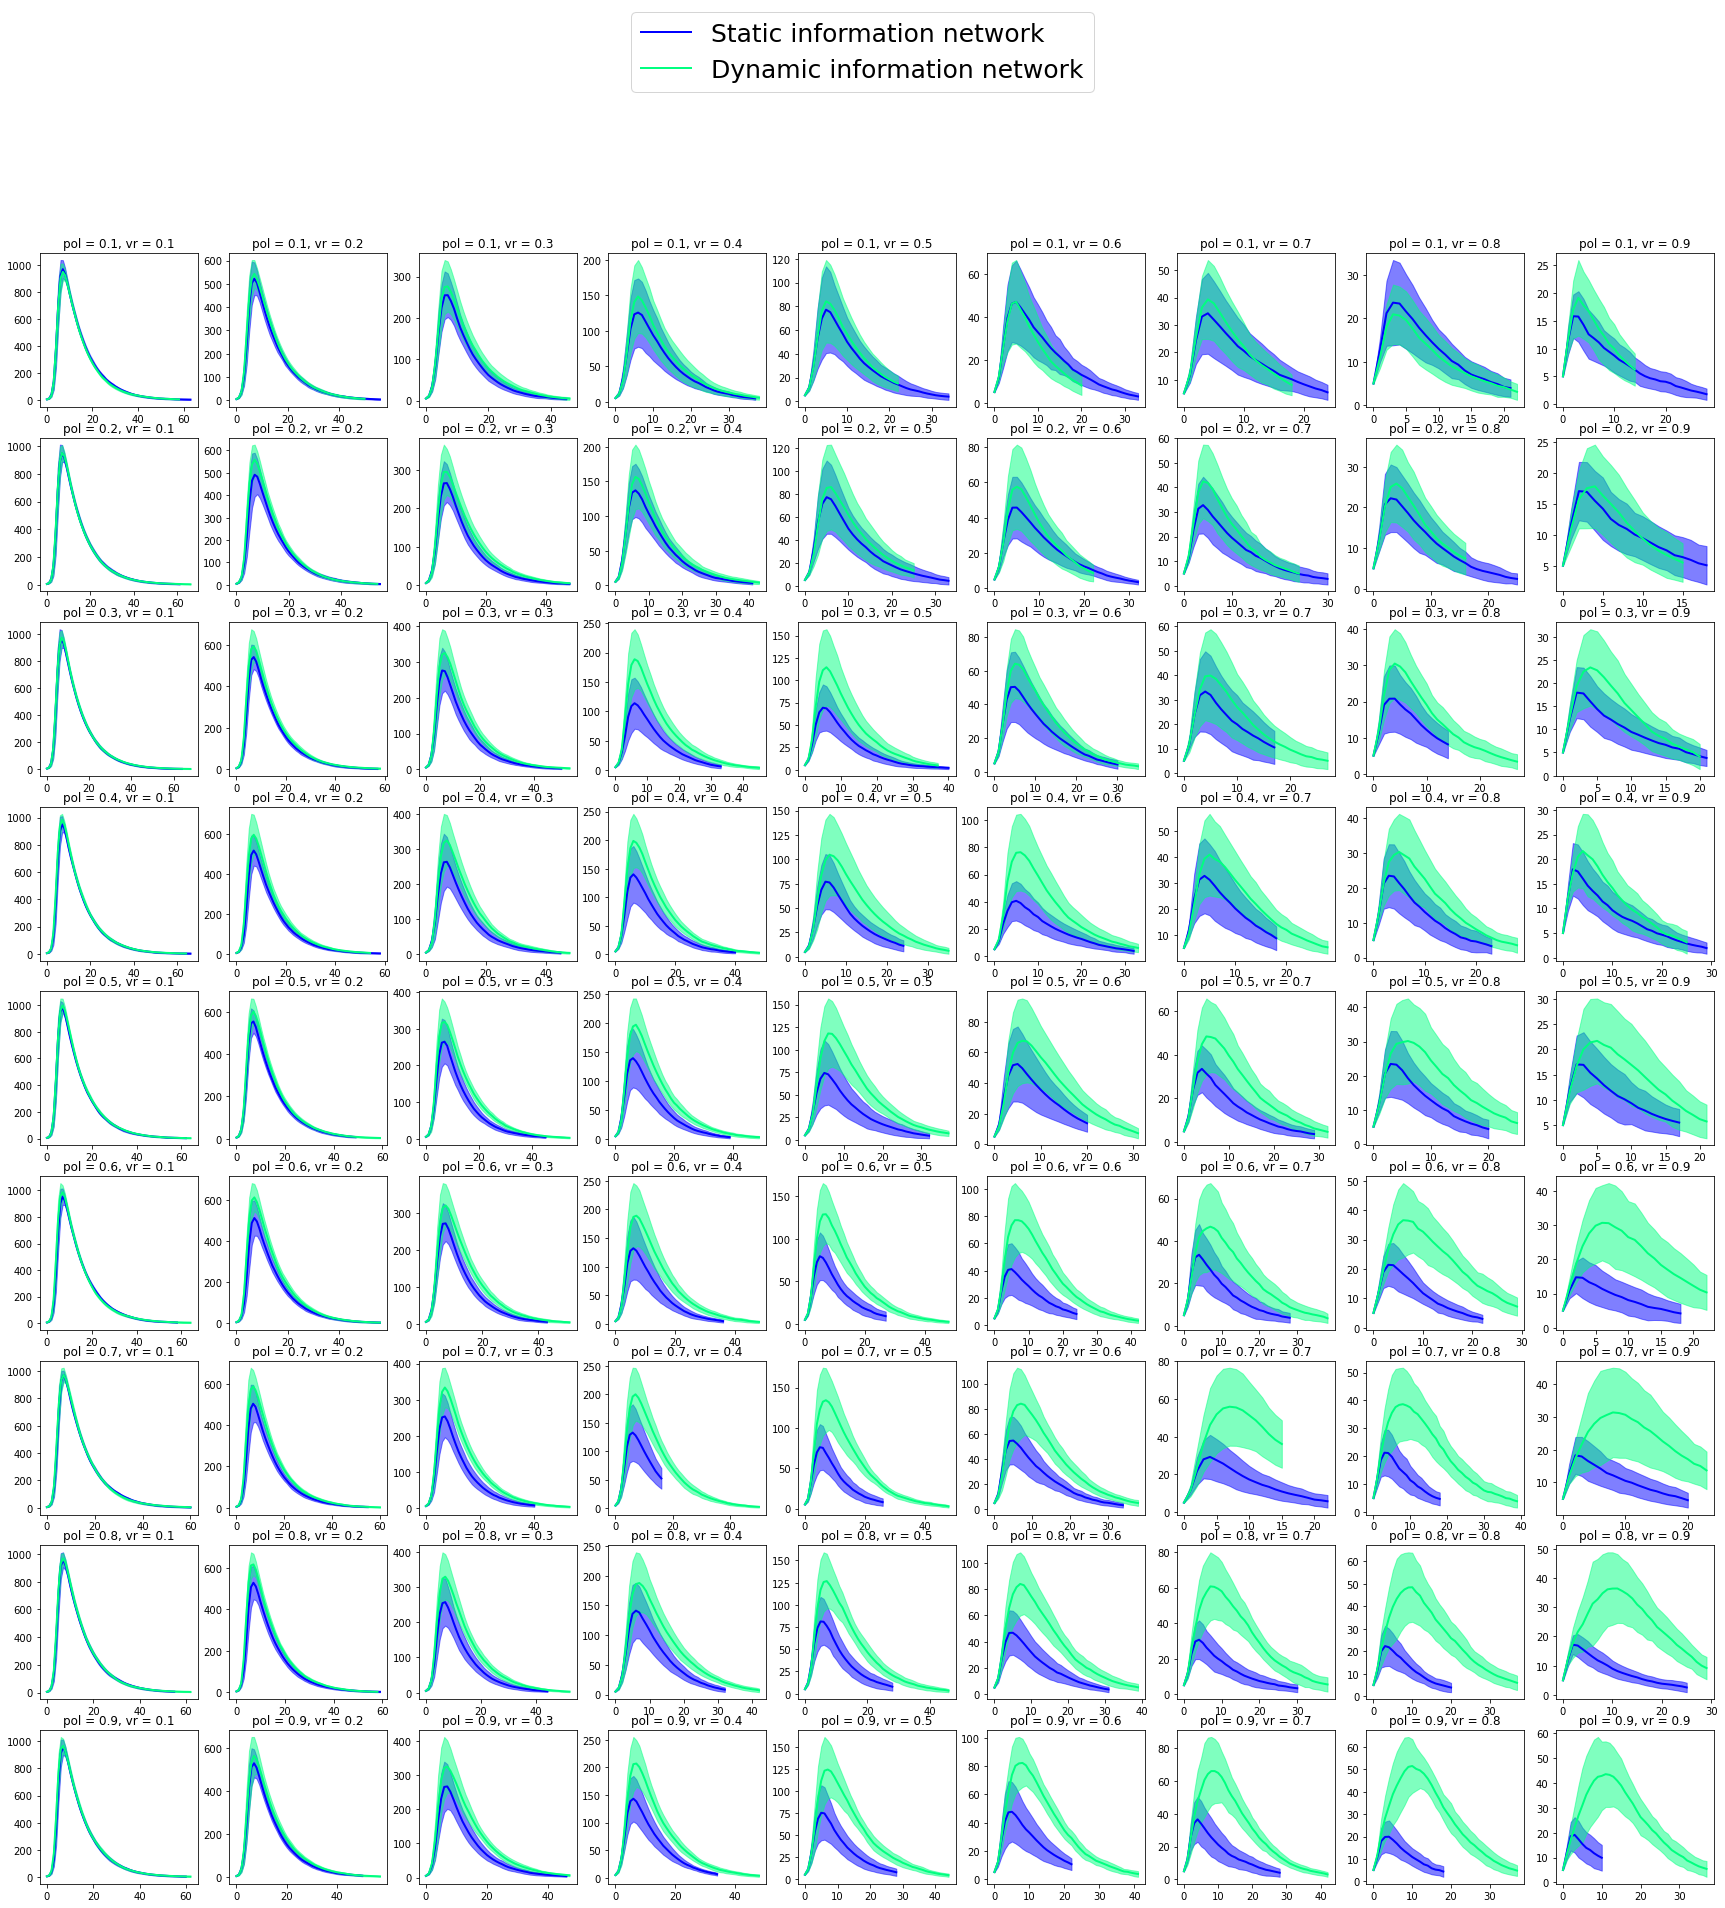

In [36]:
colors = cm.get_cmap('winter', 2)
fig, ax = plt.subplots(nrows=9, ncols=9, figsize=(30, 30))
pol_list = np.arange(0.1, 1., 0.1)
r_list = np.arange(0.1, 1., 0.1)
for i in range(9):
    pol_list[i] = round(pol_list[i], 1)
    r_list[i] = round(r_list[i], 1)
lines_list = []
for i, pol in enumerate(pol_list):
    for j, r in enumerate(r_list):
        mask1 = (static_mean.r == r) & (static_mean.pol == pol)
        mask2 = (static_std.r == r) & (static_std.pol == pol)
        mask3 = (dynamic_mean.r == r) & (dynamic_mean.pol == pol)
        mask4 = (dynamic_std.r == r) & (dynamic_std.pol == pol)
        ax_stat_mean = static_mean[mask1].set_index('time')
        ax_stat_std = static_std[mask2].set_index('time')
        ax_dyn_mean = dynamic_mean[mask3].set_index('time')
        ax_dyn_std = dynamic_std[mask4].set_index('time')

        ax[i,j].set_title(f'pol = {pol}, vr = {r}')
        ax[i,j].fill_between(ax_stat_mean.index, ax_stat_mean.I - ax_stat_std.I, ax_stat_mean.I + ax_stat_std.I, color=colors(0), alpha=0.5)
        ax[i,j].fill_between(ax_dyn_mean.index, ax_dyn_mean.I - ax_dyn_std.I, ax_dyn_mean.I + ax_dyn_std.I, color=colors(1), alpha=0.5)
        l1, = ax[i,j].plot(ax_stat_mean.index, ax_stat_mean.I, c=colors(0), lw=2)
        l2, = ax[i,j].plot(ax_dyn_mean.index, ax_dyn_mean.I, c=colors(1), lw=2)
        if (i == 0) & (j == 0):
            lines_list.append(l1)
            lines_list.append(l2)
fig.legend(lines_list, ['Static information network', 'Dynamic information network'], 'upper center', fontsize=25)



# Final attack rate

In [37]:
data_df.head()

,time,I,pol,r,ar,cc,kind,net_type
0,0,5.00,0.1,0.1,1305,0.030,mean,static
1,0,0.00,0.1,0.1,63,0.002,std,static
2,1,11.59,0.1,0.1,1305,0.030,mean,static
3,1,2.04,0.1,0.1,63,0.002,std,static
4,2,41.78,0.1,0.1,1305,0.030,mean,static


In [38]:
pol_list = np.arange(0.1, 1., 0.1)
r_list = np.arange(0.1, 1., 0.1)
for i in range(9):
    pol_list[i] = round(pol_list[i], 1)
    r_list[i] = round(r_list[i], 1)
ar_heatmap_static = np.ndarray(shape=(9, 9))
ar_heatmap_dynamic = np.ndarray(shape=(9, 9))
for i, r in enumerate(r_list):
    for j, pol in enumerate(pol_list):
        mask1 = (data_df.r == r) & (data_df.pol == pol) & (data_df.kind == 'mean') & (data_df.net_type == 'static')
        mask2 = (data_df.r == r) & (data_df.pol == pol) & (data_df.kind == 'mean') & (data_df.net_type == 'dynamic')
        ar_heatmap_static[i,j] = data_df[mask1].ar.unique()[0]
        ar_heatmap_dynamic[i,j] = data_df[mask2].ar.unique()[0]

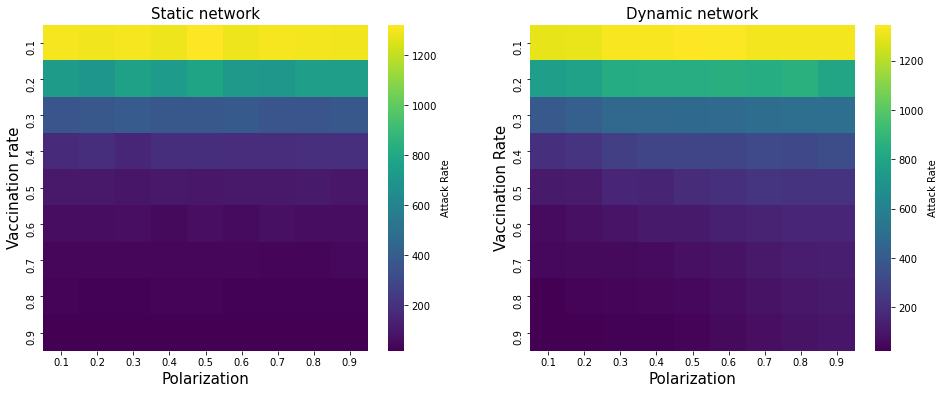

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.heatmap(ar_heatmap_static, ax=ax[0], cmap='viridis',
    xticklabels=pol_list, yticklabels=r_list,
    cbar_kws={'label': 'Attack Rate'})
sns.heatmap(ar_heatmap_dynamic, ax=ax[1], cmap='viridis',
    xticklabels=pol_list, yticklabels=r_list,
    cbar_kws={'label': 'Attack Rate'})

ax[0].set_xlabel('Polarization', size=15)
ax[0].set_ylabel('Vaccination rate', size=15)
ax[0].set_title('Static network', size=15)
ax[1].set_xlabel('Polarization', size=15)
ax[1].set_ylabel('Vaccination Rate', size=15)
ax[1].set_title('Dynamic network', size=15);

# Clustering coefficient

In [40]:
pol_list = np.arange(0.1, 1., 0.1)
r_list = np.arange(0.1, 1., 0.1)
for i in range(9):
    pol_list[i] = round(pol_list[i], 1)
    r_list[i] = round(r_list[i], 1)
cc_heatmap_mean = np.ndarray(shape=(9, 9))
cc_heatmap_std = np.ndarray(shape=(9, 9))
for i, r in enumerate(r_list):
    for j, pol in enumerate(pol_list):
        mask1 = (data_df.r == r) & (data_df.pol == pol) & (data_df.kind == 'mean') & (data_df.net_type == 'dynamic')
        mask2 = (data_df.r == r) & (data_df.pol == pol) & (data_df.kind == 'std') & (data_df.net_type == 'dynamic')
        cc_heatmap_mean[i,j] = data_df[mask1].cc.unique()[0]
        cc_heatmap_std[i,j] = data_df[mask2].cc.unique()[0]

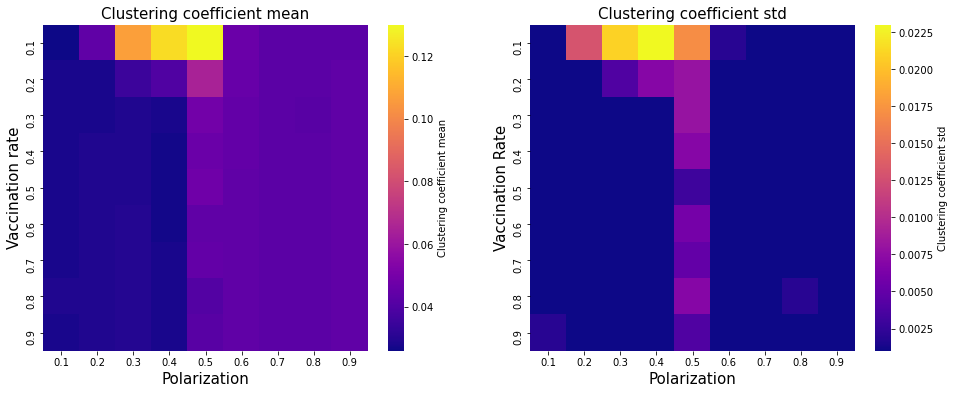

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.heatmap(cc_heatmap_mean, ax=ax[0], cmap='plasma',
    xticklabels=pol_list, yticklabels=r_list,
    cbar_kws={'label': 'Clustering coefficient mean'})
sns.heatmap(cc_heatmap_std, ax=ax[1], cmap='plasma',
    xticklabels=pol_list, yticklabels=r_list,
    cbar_kws={'label': 'Clustering coefficient std'})

ax[0].set_xlabel('Polarization', size=15)
ax[0].set_ylabel('Vaccination rate', size=15)
ax[0].set_title('Clustering coefficient mean', size=15)
ax[1].set_xlabel('Polarization', size=15)
ax[1].set_ylabel('Vaccination Rate', size=15)
ax[1].set_title('Clustering coefficient std', size=15);

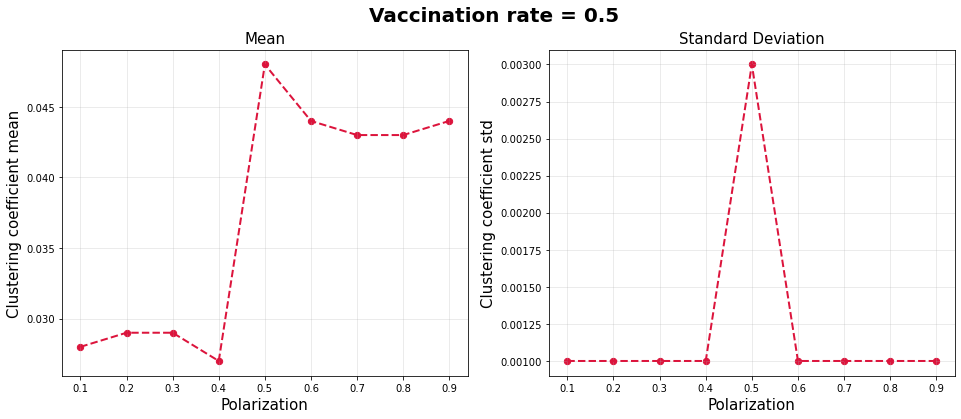

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
slice_idx = 4
cc_mean = cc_heatmap_mean[slice_idx, :]
cc_std = cc_heatmap_std[slice_idx, :]

ax[0].set_title('Mean', size=15)
ax[0].set_ylabel('Clustering coefficient mean', size=15)
ax[0].set_xlabel('Polarization', size=15)
ax[0].plot(pol_list, cc_mean, ls='dashed', lw=2, c='crimson')
ax[0].scatter(pol_list, cc_mean, s=40, c='crimson')
ax[0].grid(alpha=0.3)

ax[1].set_title('Standard Deviation', size=15)
ax[1].set_ylabel('Clustering coefficient std', size=15)
ax[1].set_xlabel('Polarization', size=15)
ax[1].plot(pol_list, cc_std, ls='dashed', lw=2, c='crimson')
ax[1].scatter(pol_list, cc_std, s=40, c='crimson')
ax[1].grid(alpha=0.3)

fig.suptitle(f'Vaccination rate = {slice_idx * 0.1 + 0.1}', size=20, fontweight='bold');
